[-1.42848501e+00 -1.42848501e+00 -6.77813090e-01 -6.77813090e-01
  6.66133815e-16  6.66133815e-16  6.77813090e-01  6.77813090e-01
  1.42848501e+00  1.42848501e+00]
[Quantum object: dims=[[2, 5], [1, 1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.10610095]
  [ 0.30312723]
  [-0.53734774]
  [ 0.63883792]
  [-0.4472136 ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]
 Quantum object: dims=[[2, 5], [1, 1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [-0.10610095]
  [ 0.30312723]
  [-0.53734774]
  [ 0.63883792]
  [-0.4472136 ]]
 Quantum object: dims=[[2, 5], [1, 1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[-0.47124932]
  [ 0.63883792]
  [-0.27914885]
  [-0.30312723]
  [ 0.4472136 ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]
 Quantum object: dims=[[2, 5], [1, 1]], shape=(10, 1), type='ket', dtype=Dens

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


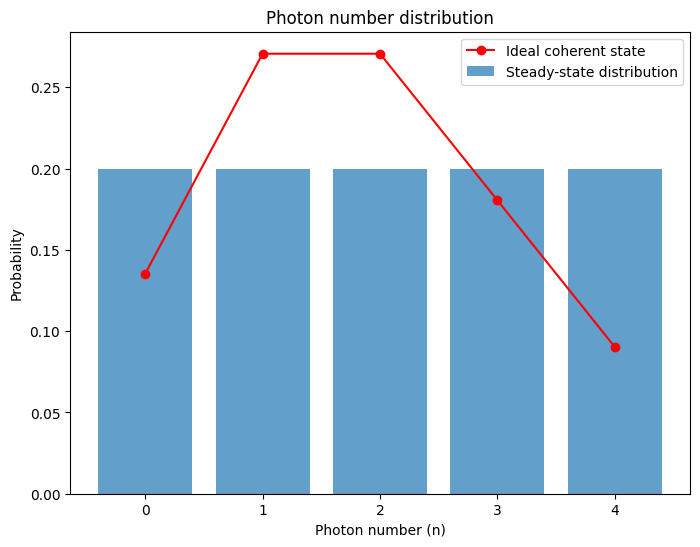

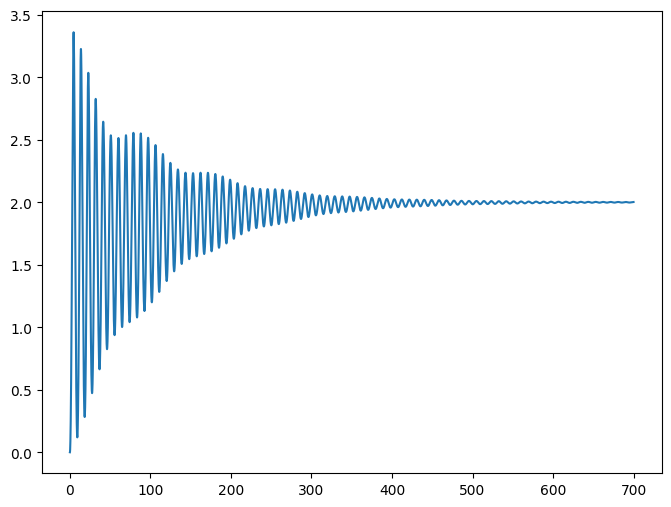

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from math import factorial

# Parameters
N = 5  # Truncated photon Hilbert space
Delta_c = 0.0  # Detuning of the cavity (omega_c - omega)
Delta_a = 0.0  # Detuning of the atom (omega_a - omega)
g = 0.0  # Coupling strength

E = 0.5 # Driving amplitude
kappa = 0.01  # Cavity decay rate
gamma = 0.0005  # Atomic decay rate


# Operators
a = destroy(N)  # Cavity annihilation operator
adag = a.dag()  # Cavity creation operator
sigma_minus = sigmam()  # Atomic lowering operator
sigma_plus = sigmap()  # Atomic raising operator

# Tensor operators
a_full = tensor(qeye(2), a)  # Cavity operator in full space
adag_full = tensor(qeye(2), adag)
sigma_minus_full = tensor(sigma_minus, qeye(N))  # Atomic operator in full space
sigma_plus_full = tensor(sigma_plus, qeye(N))

# Hamiltonian in RWA
H = Delta_c * (adag_full * a_full) + Delta_a * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + E * (a_full + adag_full)

EigVal, EigVec = H.eigenstates()
print(EigVal)
print(EigVec)
diffEigVal = [e-(e+1) for e in EigVal]
print("\n", EigVal[1] - EigVal[2], "\n")

# Collapse operators
collapse_ops = [
    np.sqrt(kappa) * a_full,  # Cavity decay
    np.sqrt(gamma) * sigma_minus_full  # Atomic decay
]

# Initial state: atom in ground state, cavity in vacuum
psi0 = tensor(basis(2, 0), basis(N, 0))

# Solve the master equation
dt=0.1
times = np.arange(0, 700, dt)  # Time range
result = mesolve(H, psi0, times, collapse_ops, [adag_full*a_full])

# Steady state
rho_ss = steadystate(H, collapse_ops)

# Mean photon number
mean_photon_number = expect(adag_full * a_full, rho_ss)
print("Mean photon number:", mean_photon_number)

# Steady-state occupation probabilities
photon_distribution = [rho_ss.ptrace(1).diag()[n] for n in range(N)]
print("Photon state probabilities:", photon_distribution)

# Coherent state distribution (for comparison)
coherent_amplitude = np.sqrt(mean_photon_number)
ideal_distribution = [np.abs(poisson.pmf(n, coherent_amplitude**2)) for n in range(N)]
#ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / factorial(n) for n in range(N)]

# Plot the photon number distribution
plt.figure(figsize=(8, 6))
plt.bar(range(N), photon_distribution, alpha=0.7, label="Steady-state distribution")
plt.plot(range(N), ideal_distribution, 'o-', c="red", label="Ideal coherent state")
plt.xlabel("Photon number (n)")
plt.ylabel("Probability")
plt.title("Photon number distribution")
plt.legend()
plt.show()

# Plot the master equation
plt.figure(figsize=(8, 6))
plt.plot(times, result.expect[0])
plt.show()

In the presence of a coupling ˜ g, the previous resonance condition is not valid anymore. Set
ω to resonance with the lowest (one-photon) dressed state of the Jaynes-Cummings model
and find again the steady state in the strong-coupling condition ˜ g ≫Γ,κ and weak drive
E. How important is the value of the pumping strength E? (Be careful that increasing E
too much could lead to instability/bistability)

In [2]:
# New parameters
omega_c = 1.  # Cavity freq
omega_a = 0.9  # Atom freq 

delta = omega_a - omega_c
g = 2.4
omega_drive = omega_c - (delta/2 - np.sqrt(g**2 + (delta/2)**2)) # Risonanza con dressed state
# omega_drive = omega_c - g # Drive freq

E = 1. # Driving amplitude
kappa = 0.24  # Cavity decay rate
gamma = 0.5*kappa  # Atomic decay rate

"""
### PAPER PARAMETERS
omega_c = 100.  # Cavity freq
omega_a = 105.  # Atom freq 

delta = omega_a - omega_c
g = 36.
omega_drive = omega_c + (delta/2 - np.sqrt(g**2 + (delta/2)**2)) # Risonanza con dressed state
# omega_drive = omega_c - g # Drive freq

E = 120. # Driving amplitude
kappa = 4.  # Cavity decay rate
gamma = 1.  # Atomic decay rate"""


# Full Hamiltonian
def H(Delta_c, Delta_a, g, E):
     
    Hamiltonian = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + E * (a_full + adag_full)

    return Hamiltonian

Mean photon number: 0.715476896969225
Photon state probabilities: [0.4660600402469839, 0.3809977398343737, 0.12687965006257595, 0.02353042241456782, 0.002532147441498964]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


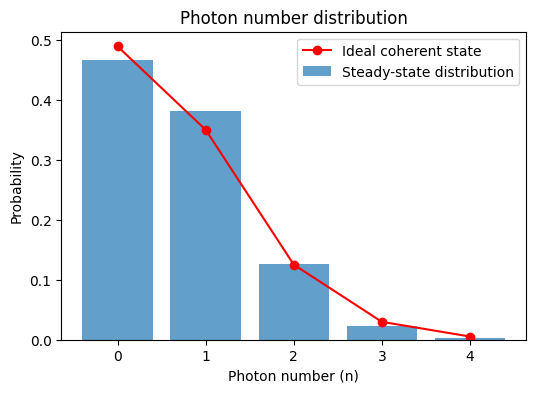

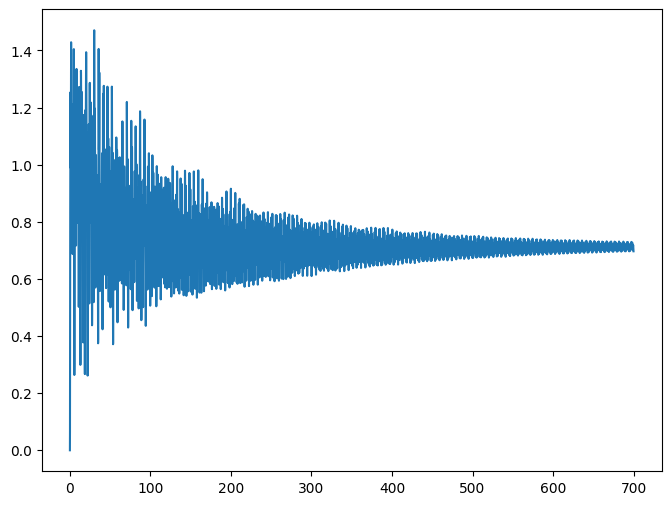

In [3]:
# Set omega to resonance with the lowest dressed state
Delta_c = omega_c - omega_drive
Delta_a = omega_a - omega_drive

# Define the new Hamiltonian
H = H(Delta_c, Delta_a, g, E)

# Solve the corresponding master equation
result = mesolve(H, psi0, times, collapse_ops, [adag_full*a_full])
# Steady state
rho_ss = steadystate(H, collapse_ops)

# Mean photon number
mean_photon_number = expect(adag_full * a_full, rho_ss)
print("Mean photon number:", mean_photon_number)

# Steady-state occupation probabilities
photon_distribution = [rho_ss.ptrace(1).diag()[n] for n in range(N)]
print("Photon state probabilities:", photon_distribution)

# Coherent state distribution (for comparison)
coherent_amplitude = np.sqrt(mean_photon_number)
ideal_distribution = [np.abs(poisson.pmf(n, coherent_amplitude**2)) for n in range(N)]
#ideal_distribution = [np.exp(-mean_photon_number) * (mean_photon_number ** n) / factorial(n) for n in range(N)]

# Plot the photon number distribution
plt.figure(figsize=(6, 4))
plt.bar(range(N), photon_distribution, alpha=0.7, label="Steady-state distribution")
plt.plot(range(N), ideal_distribution, 'o-', c="red", label="Ideal coherent state")
plt.xlabel("Photon number (n)")
plt.ylabel("Probability")
plt.title("Photon number distribution")
plt.legend()
plt.show()

# Plot the master equation
plt.figure(figsize=(8, 6))
plt.plot(times, result.expect[0])
plt.show()

In [4]:
E_amplitudes = np.array([e for e in np.arange(0, 300, 2)])

photon_numbers = np.array([])

for e in E_amplitudes:

    Ham = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + e * (a_full + adag_full)

    # Steady state
    rho_ss = steadystate(Ham, collapse_ops)

    # Mean photon number
    mean_photon_number = expect(adag_full * a_full, rho_ss)
    photon_numbers = np.append(photon_numbers, mean_photon_number)

[3.21860872e-16 1.36479800e+00 1.77584826e+00 1.90732402e+00
 1.96495798e+00 1.98758982e+00 1.99510477e+00 1.99788124e+00
 1.99904489e+00 1.99958146e+00 1.99984556e+00 1.99998079e+00
 2.00005107e+00 2.00008704e+00 2.00010428e+00 2.00011107e+00
 2.00011200e+00 2.00010966e+00 2.00010556e+00 2.00010058e+00
 2.00009525e+00 2.00008986e+00 2.00008461e+00 2.00007959e+00
 2.00007484e+00 2.00007038e+00 2.00006623e+00 2.00006237e+00
 2.00005879e+00 2.00005546e+00 2.00005238e+00 2.00004953e+00
 2.00004688e+00 2.00004443e+00 2.00004215e+00 2.00004003e+00
 2.00003805e+00 2.00003622e+00 2.00003450e+00 2.00003290e+00
 2.00003141e+00 2.00003001e+00 2.00002870e+00 2.00002747e+00
 2.00002631e+00 2.00002523e+00 2.00002421e+00 2.00002324e+00
 2.00002234e+00 2.00002148e+00 2.00002067e+00 2.00001991e+00
 2.00001918e+00 2.00001850e+00 2.00001785e+00 2.00001723e+00
 2.00001664e+00 2.00001609e+00 2.00001555e+00 2.00001505e+00
 2.00001457e+00 2.00001411e+00 2.00001367e+00 2.00001326e+00
 2.00001286e+00 2.000012

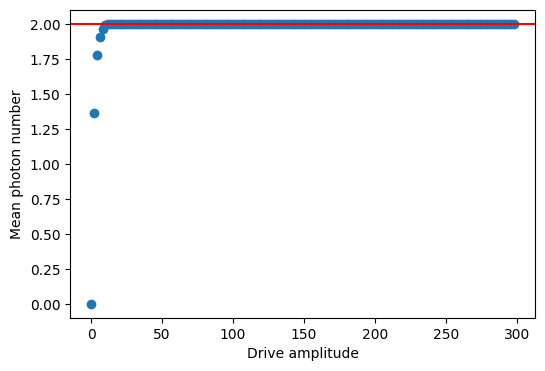

In [5]:
print(photon_numbers)

plt.figure(figsize=(6, 4))
plt.axhline(2, c="red")
plt.scatter(E_amplitudes, photon_numbers)
plt.xlabel("Drive amplitude")
plt.ylabel("Mean photon number")
plt.show()

A way to understand the suppression of two-photon states is to compute the two-photon
correlation function g(2) ≡⟨ˆ
a†ˆ
a†ˆ
aˆ
a⟩/|⟨ˆ
a†ˆ
a⟩|2, which compares the probability to find two
simultaneous photons with the one of having to independent photons at random. In the
blockade regime, you should find g(2) <1.

In [6]:
"""# New parameters
g = 4.5  # Coupling strength
omega_c = 1.2  # Cavity freq
omega_a = 0.6  # Atom freq 

delta = omega_a - omega_c
omega_drive = omega_c - (delta/2 - np.sqrt(g**2 + (delta/2)**2))
# omega_drive = omega_c - g # Drive freq

E = 1.2 # Driving amplitude
kappa = 0.002  # Cavity decay rate
gamma = 0.04  # Atomic decay rate

print("Lifetime: ", 2/(gamma+kappa))"""

times = np.arange(0, 50, dt)

# Full Hamiltonian
def H(Delta_c, Delta_a, g, E):
     
    Hamiltonian = (Delta_c) * (adag_full * a_full) + (Delta_a) * (sigma_plus_full * sigma_minus_full) \
    + g * (sigma_plus_full * a_full + sigma_minus_full * adag_full) \
    + E * (a_full + adag_full)

    return Hamiltonian

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


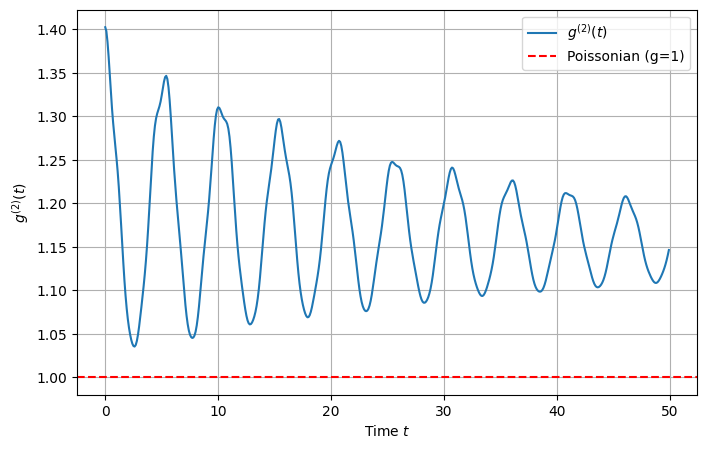

0.0225
[1.40243123+0.00000000e+00j 1.39786735-9.73544030e-03j
 1.38565846-1.94270395e-02j 1.36855351-2.77809366e-02j
 1.34865209-3.37016934e-02j 1.32800109-3.74437038e-02j
 1.30892422-3.94331338e-02j 1.2925112 -3.96413153e-02j
 1.27814127-3.86442287e-02j 1.26479548-3.76207091e-02j
 1.25144837-3.70888195e-02j 1.2365431 -3.70017028e-02j
 1.21881397-3.76848529e-02j 1.19847511-3.93080669e-02j
 1.17659495-4.10348183e-02j 1.15403163-4.18305046e-02j
 1.13178506-4.14253442e-02j 1.11132085-3.98100762e-02j
 1.09367242-3.67497786e-02j 1.07892536-3.23159541e-02j
 1.06683103-2.70345032e-02j 1.05713307-2.13012922e-02j
 1.04936471-1.53448320e-02j 1.04314386-9.57536827e-03j
 1.03856301-4.32154474e-03j 1.03587788+4.45741704e-04j
 1.03525709+4.73101470e-03j 1.03705745+8.37511481e-03j
 1.04168142+1.14993993e-02j 1.0489784 +1.45140740e-02j
 1.05829505+1.76691162e-02j 1.06899866+2.10774207e-02j
 1.08054135+2.49135994e-02j 1.09246616+2.91302875e-02j
 1.10484874+3.33418598e-02j 1.11834234+3.72231034e-02j
 1.

In [7]:
# Collapse operators
collapse_ops = [
    kappa * a_full,  # Cavity decay
    gamma * sigma_minus_full  # Atomic decay
]

# Define the new Hamiltonian
H = H(Delta_c, Delta_a, g, E)
# Solve the corresponding master equation
result = mesolve(H, psi0, times, collapse_ops, [adag_full*a_full])
# Steady state
rho_ss = steadystate(H, collapse_ops)

# Calcolo della correlazione
corr = correlation_2op_1t(H, rho_ss, times, collapse_ops, adag_full, a_full)

# Normalizzazione per calcolare g^(2)(t)
g2_t = corr / (expect(adag_full * a_full, rho_ss))**2

# Grafico della funzione g^(2)(t)
plt.figure(figsize=(8, 5))
plt.plot(times, np.real(g2_t), label=r"$g^{(2)}(t)$")
plt.axhline(1, color="red", linestyle="--", label="Poissonian (g=1)")
plt.xlabel("Time $t$")
plt.ylabel(r"$g^{(2)}(t)$")
plt.legend()
plt.grid()
plt.show()

print((kappa+gamma)**2/g**2)
print(g2_t)

Scan the values of ω around the resonance and graphically represent your findings.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
/var/folders/9p/sxfs2z3j2ln1p3kz5qdq03_w0000gn/T/ipykernel_1802/3767009704.py:9: RuntimeWarning: invalid value encountered in divide
  g2_t = G2_t_numerator / (n_photon_t**2)


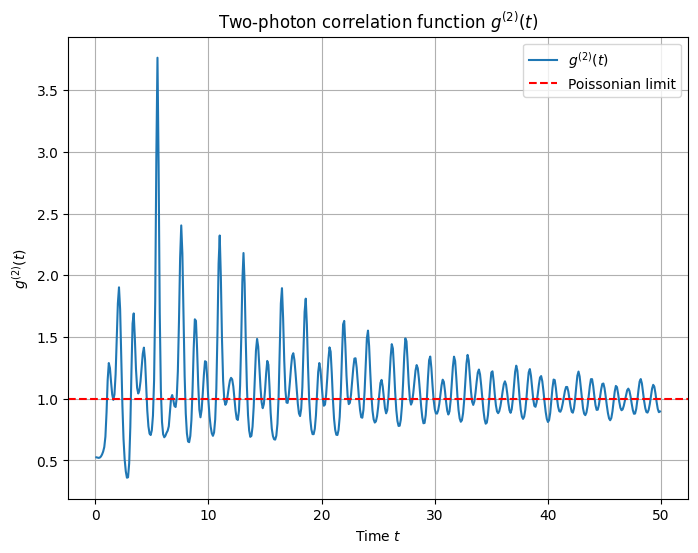

In [8]:

# Risoluzione della dinamica temporale
result = mesolve(H, psi0, times, collapse_ops, [adag_full * a_full, adag_full * adag_full * a_full * a_full])

# Estrazione delle osservabili
n_photon_t = result.expect[0]  # Numero medio di fotoni nel tempo
G2_t_numerator = result.expect[1]  # Numeratore di g^(2)(t)

# Calcolo di g^(2)(t)
g2_t = G2_t_numerator / (n_photon_t**2)

# Plot della funzione g^(2)(t)
plt.figure(figsize=(8, 6))
plt.plot(times, np.real(g2_t), label=r"$g^{(2)}(t)$")
plt.axhline(1, color="red", linestyle="--", label="Poissonian limit")
plt.xlabel("Time $t$")
plt.ylabel(r"$g^{(2)}(t)$")
plt.legend()
plt.grid()
plt.title("Two-photon correlation function $g^{(2)}(t)$")
plt.show()
